In [10]:
# Load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn import svm

#path = 'C:\\Users\\Caroline\\Documents\\School\\Intro to Data Science\\Term Project\\'

import project_env as pe

%matplotlib inline

In [11]:
data = pe.load_split_bucket(519, target='y_60m', log=False) #need to run this in the same folder as the data

In [12]:
training_X, training_y = data['train']

print(len(training_X.columns))
print(training_X.columns)

22
Index(['apparentTemperature', 'cloudCover', 'dewPoint', 'humidity',
       'nearestStormDistance', 'ozone', 'precipIntensity', 'precipProbability',
       'pressure', 'temperature', 'visibility', 'windBearing', 'windSpeed',
       'num_bikes_available_scaled', 'num_bikes_disabled_scaled',
       'num_docks_available_scaled', 'day_of_week', 'hour_of_day',
       'is_weekend', 'traffic_0_speed_scrub', 'traffic_1_speed_scrub',
       'traffic_2_speed_scrub'],
      dtype='object')


Multiclass SVM

In [13]:
def do_svm(split_data):
    train_X, train_y = split_data['train']
    dev_X, dev_y = split_data['dev']
    
    svm_class_prediction = svm.SVC(kernel='linear')
    svm_probability = svm.SVC(kernel='linear', probability=True)
    scaler = sklearn.preprocessing.StandardScaler()
    train_X_scaled = scaler.fit_transform(train_X)
    
    svm_class_prediction.fit(train_X_scaled, train_y)
    svm_probability.fit(train_X_scaled, train_y)

    dev_X_scaled = scaler.transform(dev_X)
        
    dev_pred = svm_class_prediction.predict(dev_X_scaled)
    dev_decision = svm_probability.predict_proba(dev_X_scaled)[:,1]
    acc = sklearn.metrics.accuracy_score(dev_y, dev_pred)
    print('Evaluating on dev set of {} examples'.format(len(dev_y)))
    print('Accuracy:', acc)
    
    print(sklearn.metrics.confusion_matrix(dev_y, dev_pred))

    plt.figure()
    plt.plot(dev_y.as_matrix()[100:500], 'b')
    plt.plot(dev_pred[100:500], 'g')
    plt.plot(0.5 * (dev_y.as_matrix() - dev_pred)[100:500], 'r')
    plt.ylim(-3, 3)
    plt.show()
    
    return svm, dev_decision, dev_pred

Evaluating on dev set of 968 examples
Accuracy: 0.79958677686
[[432 153]
 [ 41 342]]


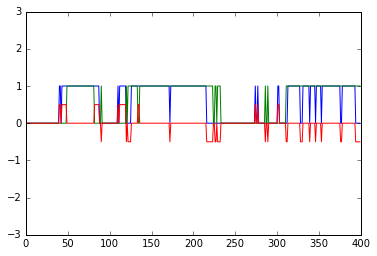

In [5]:
data_empty = pe.binarize(data, -1)
svm_empty, dev_decision_empty, dev_pred_empty = do_svm(data_empty)

Evaluating on dev set of 968 examples
Accuracy: 0.95041322314
[[920   0]
 [ 48   0]]


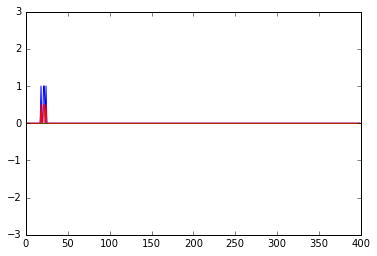

In [6]:
data_full = pe.binarize(data, 1)
svm_full, dev_decision_full, dev_pred_full = do_svm(data_full)

In [7]:
data_full['dev'][0].columns

Index(['apparentTemperature', 'cloudCover', 'dewPoint', 'humidity',
       'nearestStormDistance', 'ozone', 'precipIntensity', 'precipProbability',
       'pressure', 'temperature', 'visibility', 'windBearing', 'windSpeed',
       'num_bikes_available_scaled', 'num_bikes_disabled_scaled',
       'num_docks_available_scaled', 'day_of_week', 'hour_of_day',
       'is_weekend', 'traffic_0_speed_scrub', 'traffic_1_speed_scrub',
       'traffic_2_speed_scrub'],
      dtype='object')

Model baseline empty
  Max precision: 0.528301886792 at recall 0.950391644909
  Threshold of max precision: 0.540983606557
Model SVM empty
  Max precision: 0.561538461538 at recall 0.953002610966
  Threshold of max precision: 0.19351823198


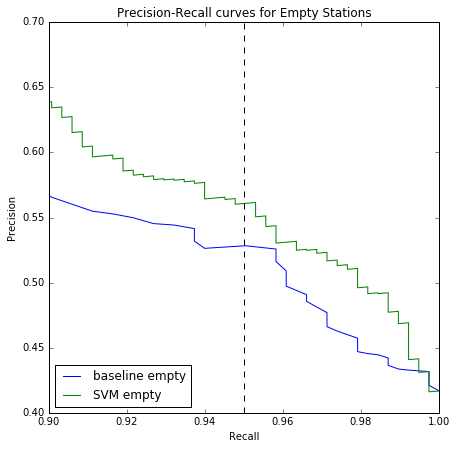

In [8]:
from sklearn.metrics import precision_recall_curve

gold_labels = data_empty['dev'][1]

def pr_curve(predictions, label):
    curve = precision_recall_curve(gold_labels, predictions)
    precision, recall, thresholds = curve
    mp, mr, mt = pe.max_precision_for_recall(curve)
    print('Model', label)
    print('  Max precision:', mp, 'at recall', mr)
    print('  Threshold of max precision:', mt)
    plt.plot(recall, precision, label=label)
   
plt.figure(figsize=(7, 7))
pr_curve(data_empty['dev'][0]['num_docks_available_scaled'], 'baseline empty')
pr_curve(dev_decision_empty, 'SVM empty')

plt.xlim([0.9, 1.0])
plt.ylim([0.4, 0.7])
plt.axvline(x=0.95, color='k', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.title('Precision-Recall curves for Empty Stations')
plt.show()

Model baseline full
  Max precision: 0.301282051282 at recall 0.979166666667
  Threshold of max precision: 0.590163934426
Model SVM full
  Max precision: 0.308724832215 at recall 0.958333333333
  Threshold of max precision: 0.0109607943015


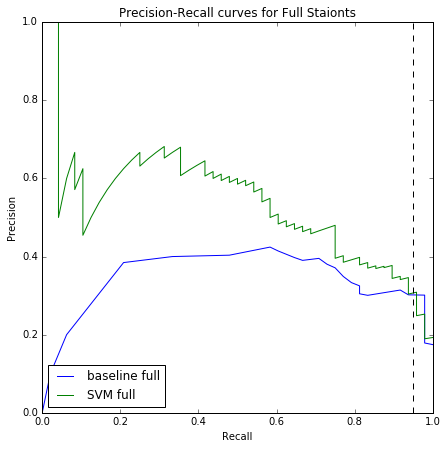

In [9]:
gold_labels = data_full['dev'][1]
   
plt.figure(figsize=(7, 7))
pr_curve(data_full['dev'][0]['num_bikes_available_scaled'], 'baseline full')
pr_curve(dev_decision_full, 'SVM full')

#plt.xlim([0.9, 1.0])
#plt.ylim([0.4, 0.7])
plt.axvline(x=0.95, color='k', linestyle='--')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.title('Precision-Recall curves for Full Staionts')
plt.show()